In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/dd/8a/76c34f0483a66e266c64c6110fa5b06004b8934fff3fcab65c218dd6e48c/tensorflow-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/98/35/844093df99983773f2c33be2f332047e1a531998f67da712358250cbf5e8/tensorflow_macos-2.15.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


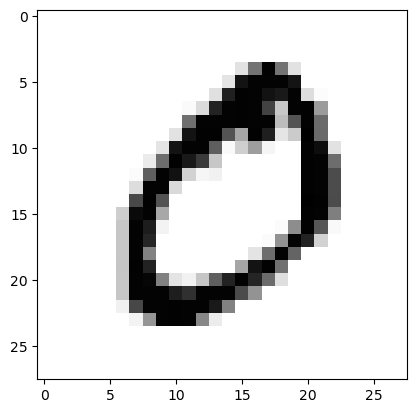

In [6]:
plt.imshow(x_train[1], cmap='Greys')

In [7]:
# create a model

In [11]:
model_lr = tf.keras.models.Sequential([
        layers.Dense(10, activation="softmax", input_shape=x_train.shape[1:])
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy')
model_lr.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 10)            290       
                                                                 
Total params: 290 (1.13 KB)
Trainable params: 290 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# make it 2-d (28*28 -> 784 into 10)

In [12]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

1875/1875 [==============================] - 1s 316us/step - loss: 0.4659 - accuracy: 0.8778


In [15]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model_lr.fit(x_train, y_train)

1875/1875 [==============================] - 1s 317us/step - loss: 0.4696 - accuracy: 0.8777


In [17]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

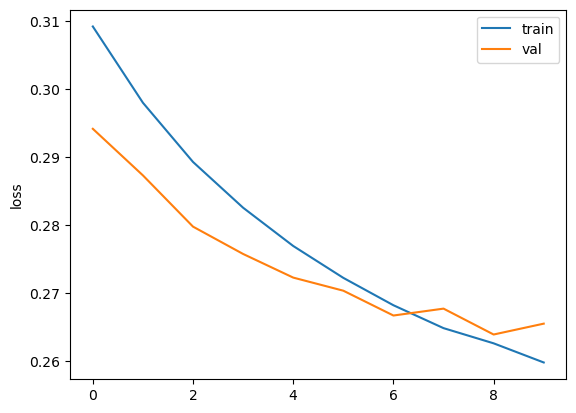

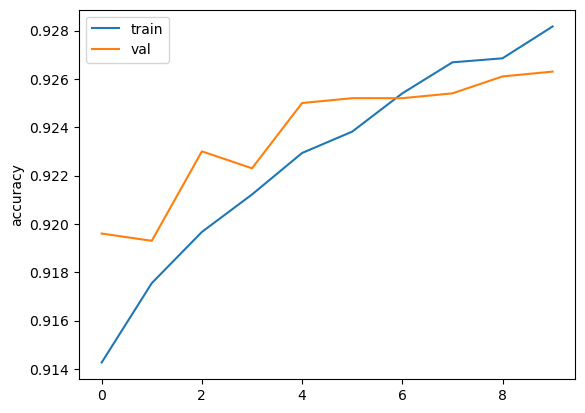

In [18]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [19]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 0s 260us/step - loss: 0.2655 - accuracy: 0.9263


[0.26548275351524353, 0.9262999892234802]

1/1 [==============================] - 0s 37ms/step
[5.7129755e-06 8.0127224e-11 1.8099649e-05 4.8553143e-03 7.7256203e-07
 2.3502364e-05 6.4116545e-10 9.9468744e-01 1.9156130e-05 3.8994127e-04]  =>  7


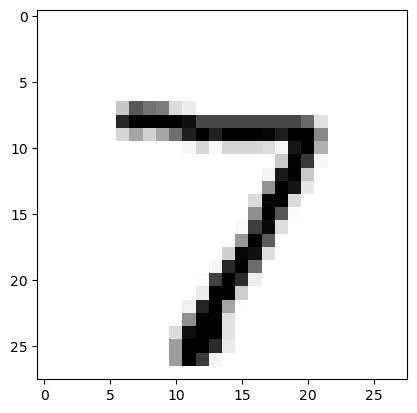

[9.4440026e-04 6.1728483e-06 9.8161602e-01 1.0872603e-03 7.8382380e-13
 6.4951056e-03 9.5975976e-03 2.0099622e-15 2.5349366e-04 6.1712870e-12]  =>  2


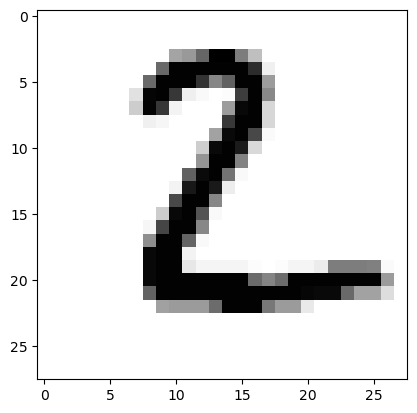

[3.3783472e-06 9.7553319e-01 1.3580876e-02 2.8548462e-03 1.9593106e-04
 6.6363899e-04 1.3731910e-03 1.4390720e-03 3.9875475e-03 3.6836183e-04]  =>  1


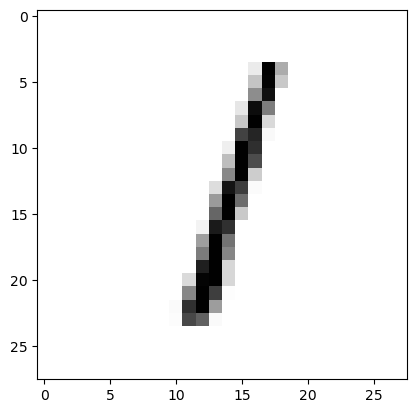

[9.9980468e-01 1.6295834e-11 5.2235777e-05 3.6766567e-06 3.4881431e-08
 3.6874389e-05 6.9784495e-05 9.8940636e-06 1.1125818e-05 1.1711601e-05]  =>  0


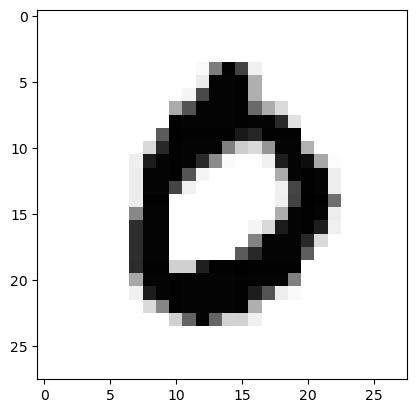

[4.3188533e-04 4.5853557e-07 2.0499015e-03 5.4428001e-05 9.6499455e-01
 1.2530928e-04 1.3143356e-03 3.1312923e-03 2.8272173e-03 2.5070677e-02]  =>  4


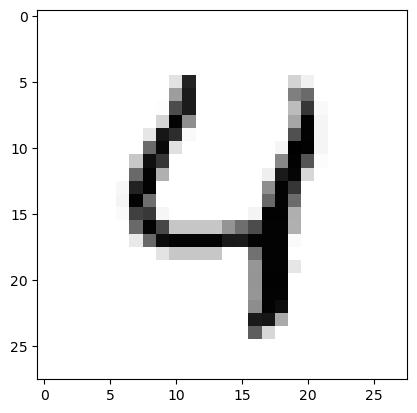

In [20]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [26]:
probs = model_lr.predict(x_test[0].reshape(1,28,28))
preds = np.argmax(probs, axis=1)
print(preds)

1/1 [==============================] - 0s 10ms/step
[7]


In [24]:
probs = model_lr.predict(x_test[18:19])
preds = np.argmax(probs, axis=1)
print(preds)

1/1 [==============================] - 0s 10ms/step
[3]


In [27]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

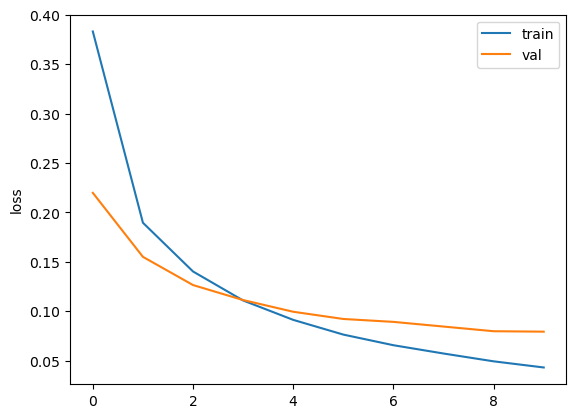

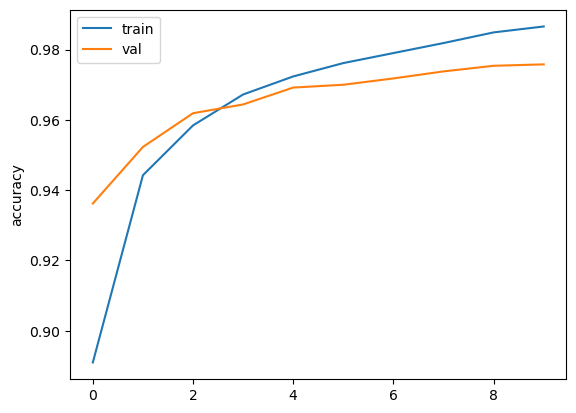

In [29]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()